In [105]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import datetime
import matplotlib.dates as mdates
import yfinance as yf
plt.style.use('fivethirtyeight')

In [106]:
security = 'META'
his_period = 60  # 历史时间
timeStruct = datetime.datetime.now().strftime("%Y-%m-%d")
df = yf.download(security)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-06,315.980011,318.329987,314.450012,315.799988,315.799988,12887700
2023-11-07,317.059998,321.000000,315.119995,318.820007,318.820007,14055600
2023-11-08,318.140015,321.329987,314.880005,319.779999,319.779999,13609700
2023-11-09,319.420013,324.179993,318.799988,320.549988,320.549988,16103100
2023-11-10,319.940002,329.100006,319.459991,328.769989,328.769989,19096200
2023-11-13,326.200012,332.329987,325.700012,329.190002,329.190002,16908900
2023-11-14,334.540009,338.100006,333.329987,336.309998,336.309998,17179400
2023-11-15,337.929993,338.399994,330.019989,332.709991,332.709991,14531200
2023-11-16,329.369995,334.579987,326.380005,334.190002,334.190002,18932600


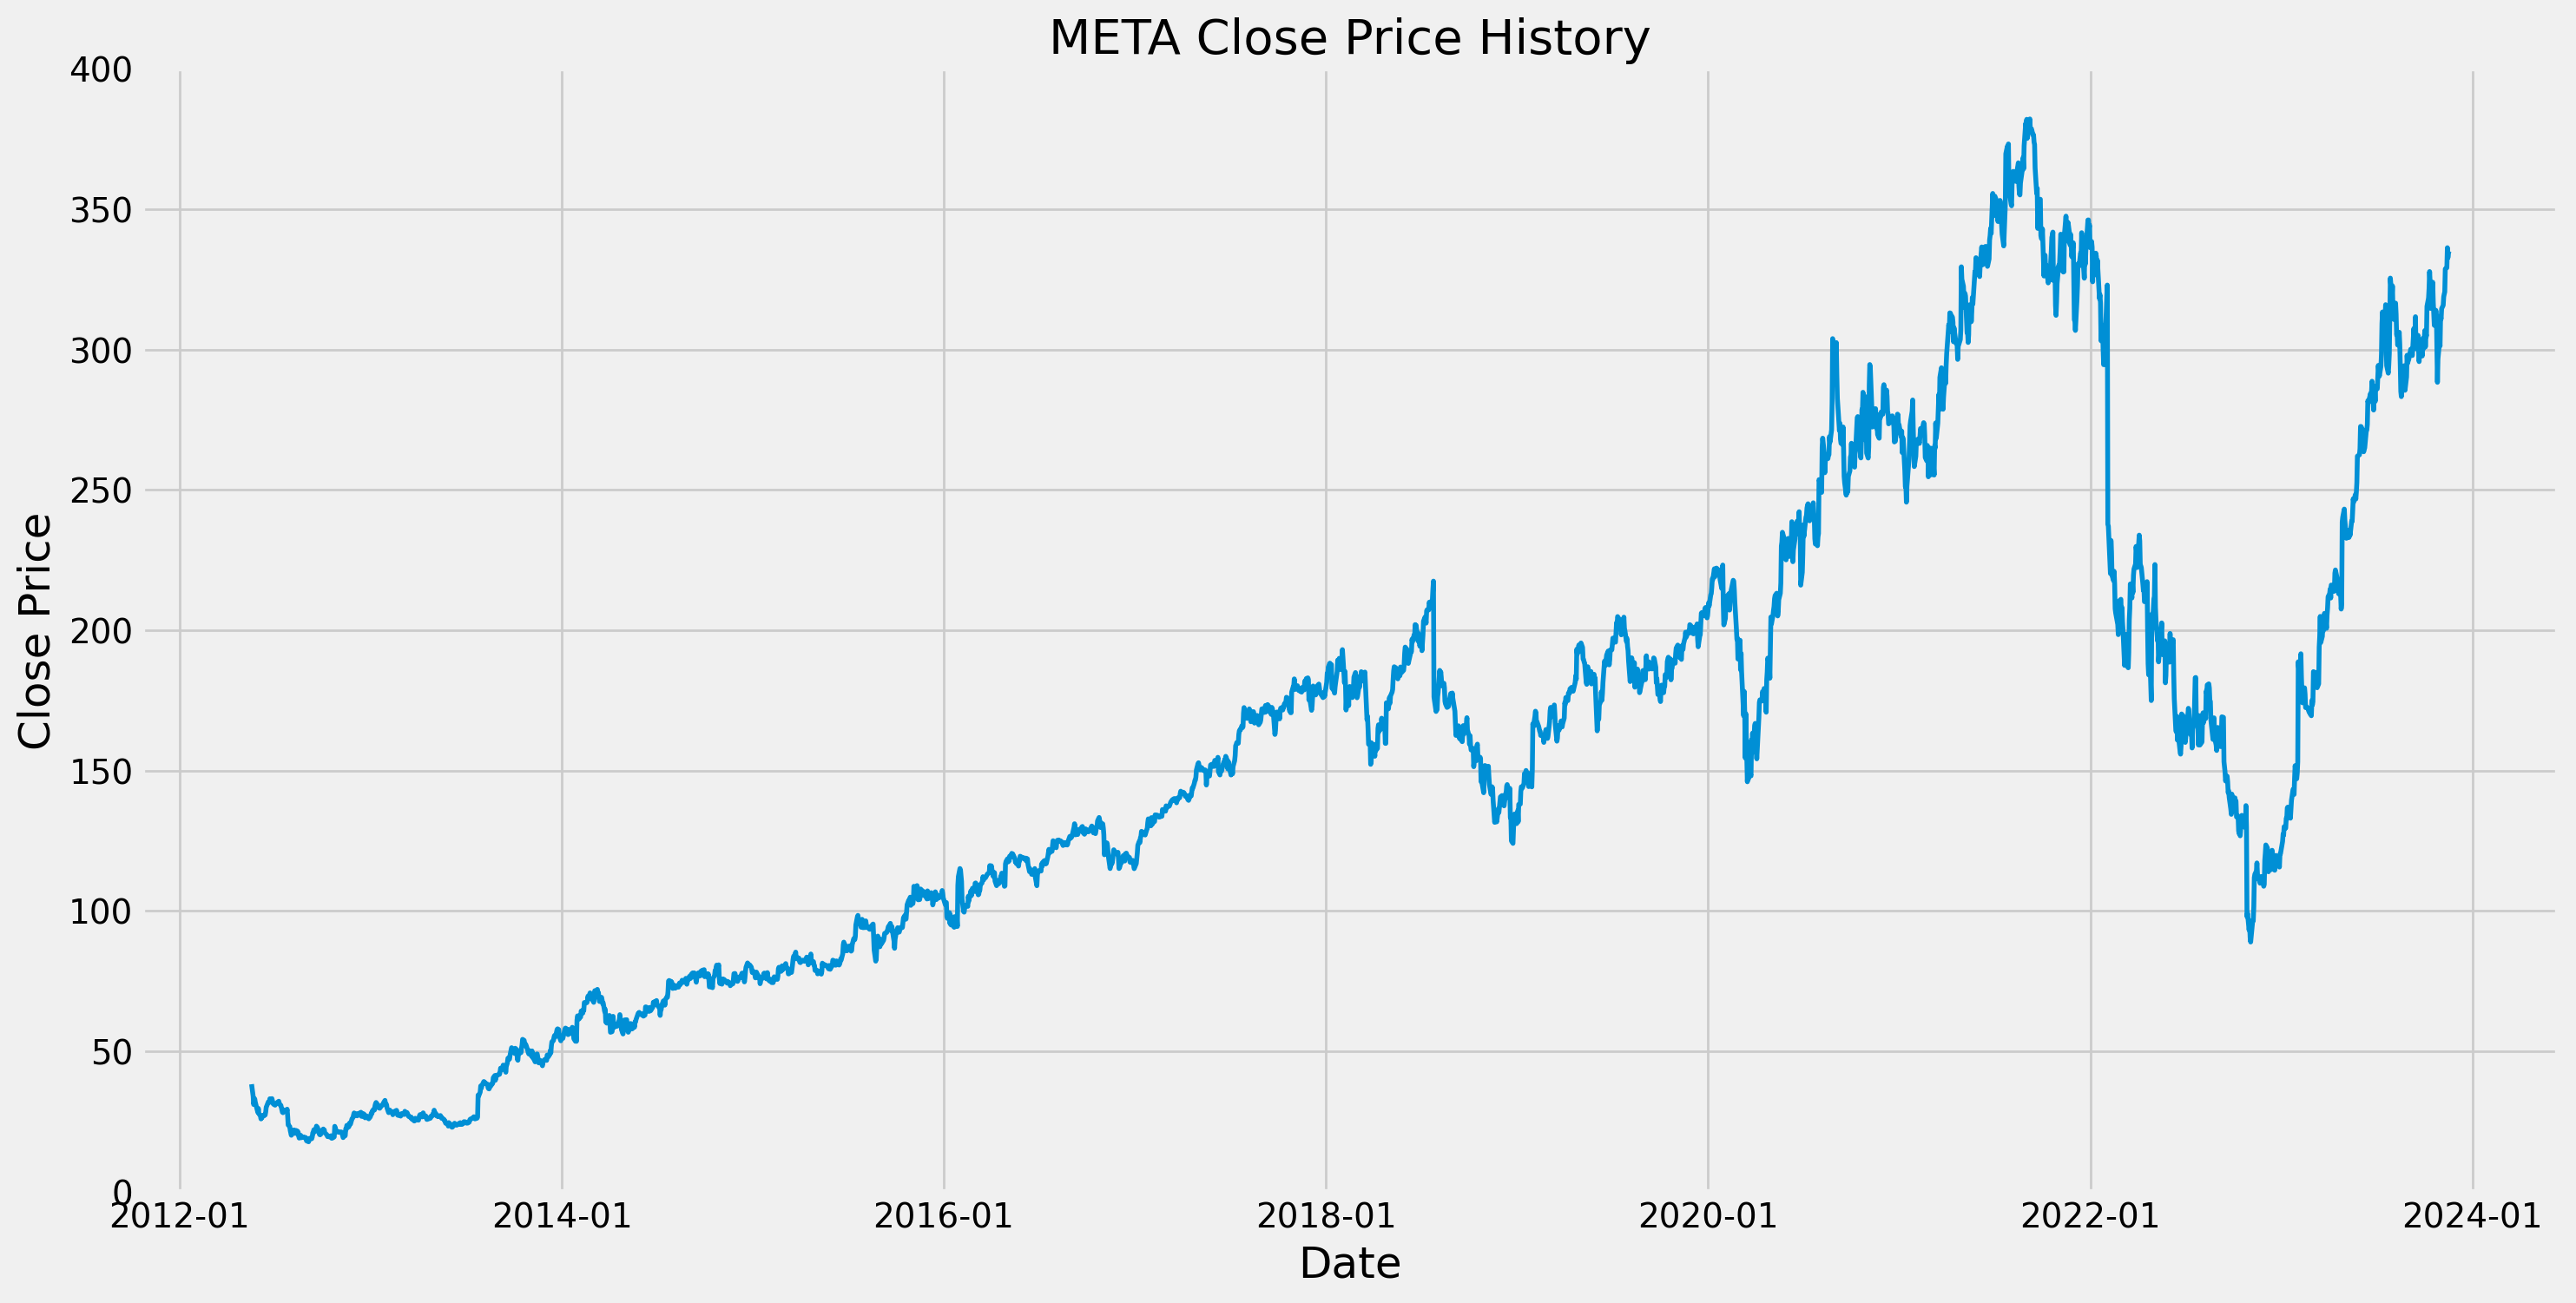

In [107]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('{} Close Price History'.format(security))
plt.plot(df['Close'], linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
# 使用AutoDateLocator自动确定日期的显示间隔
date_locator = mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(date_locator)
# 设置日期的显示格式为"%Y-%m"，即年份-月份
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# 设置日期的显示格式为"%Y-%m"，即年份-月份
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#show
# plt.savefig('{}_PriceHistory.png'.format(security))
plt.show()

In [108]:
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()

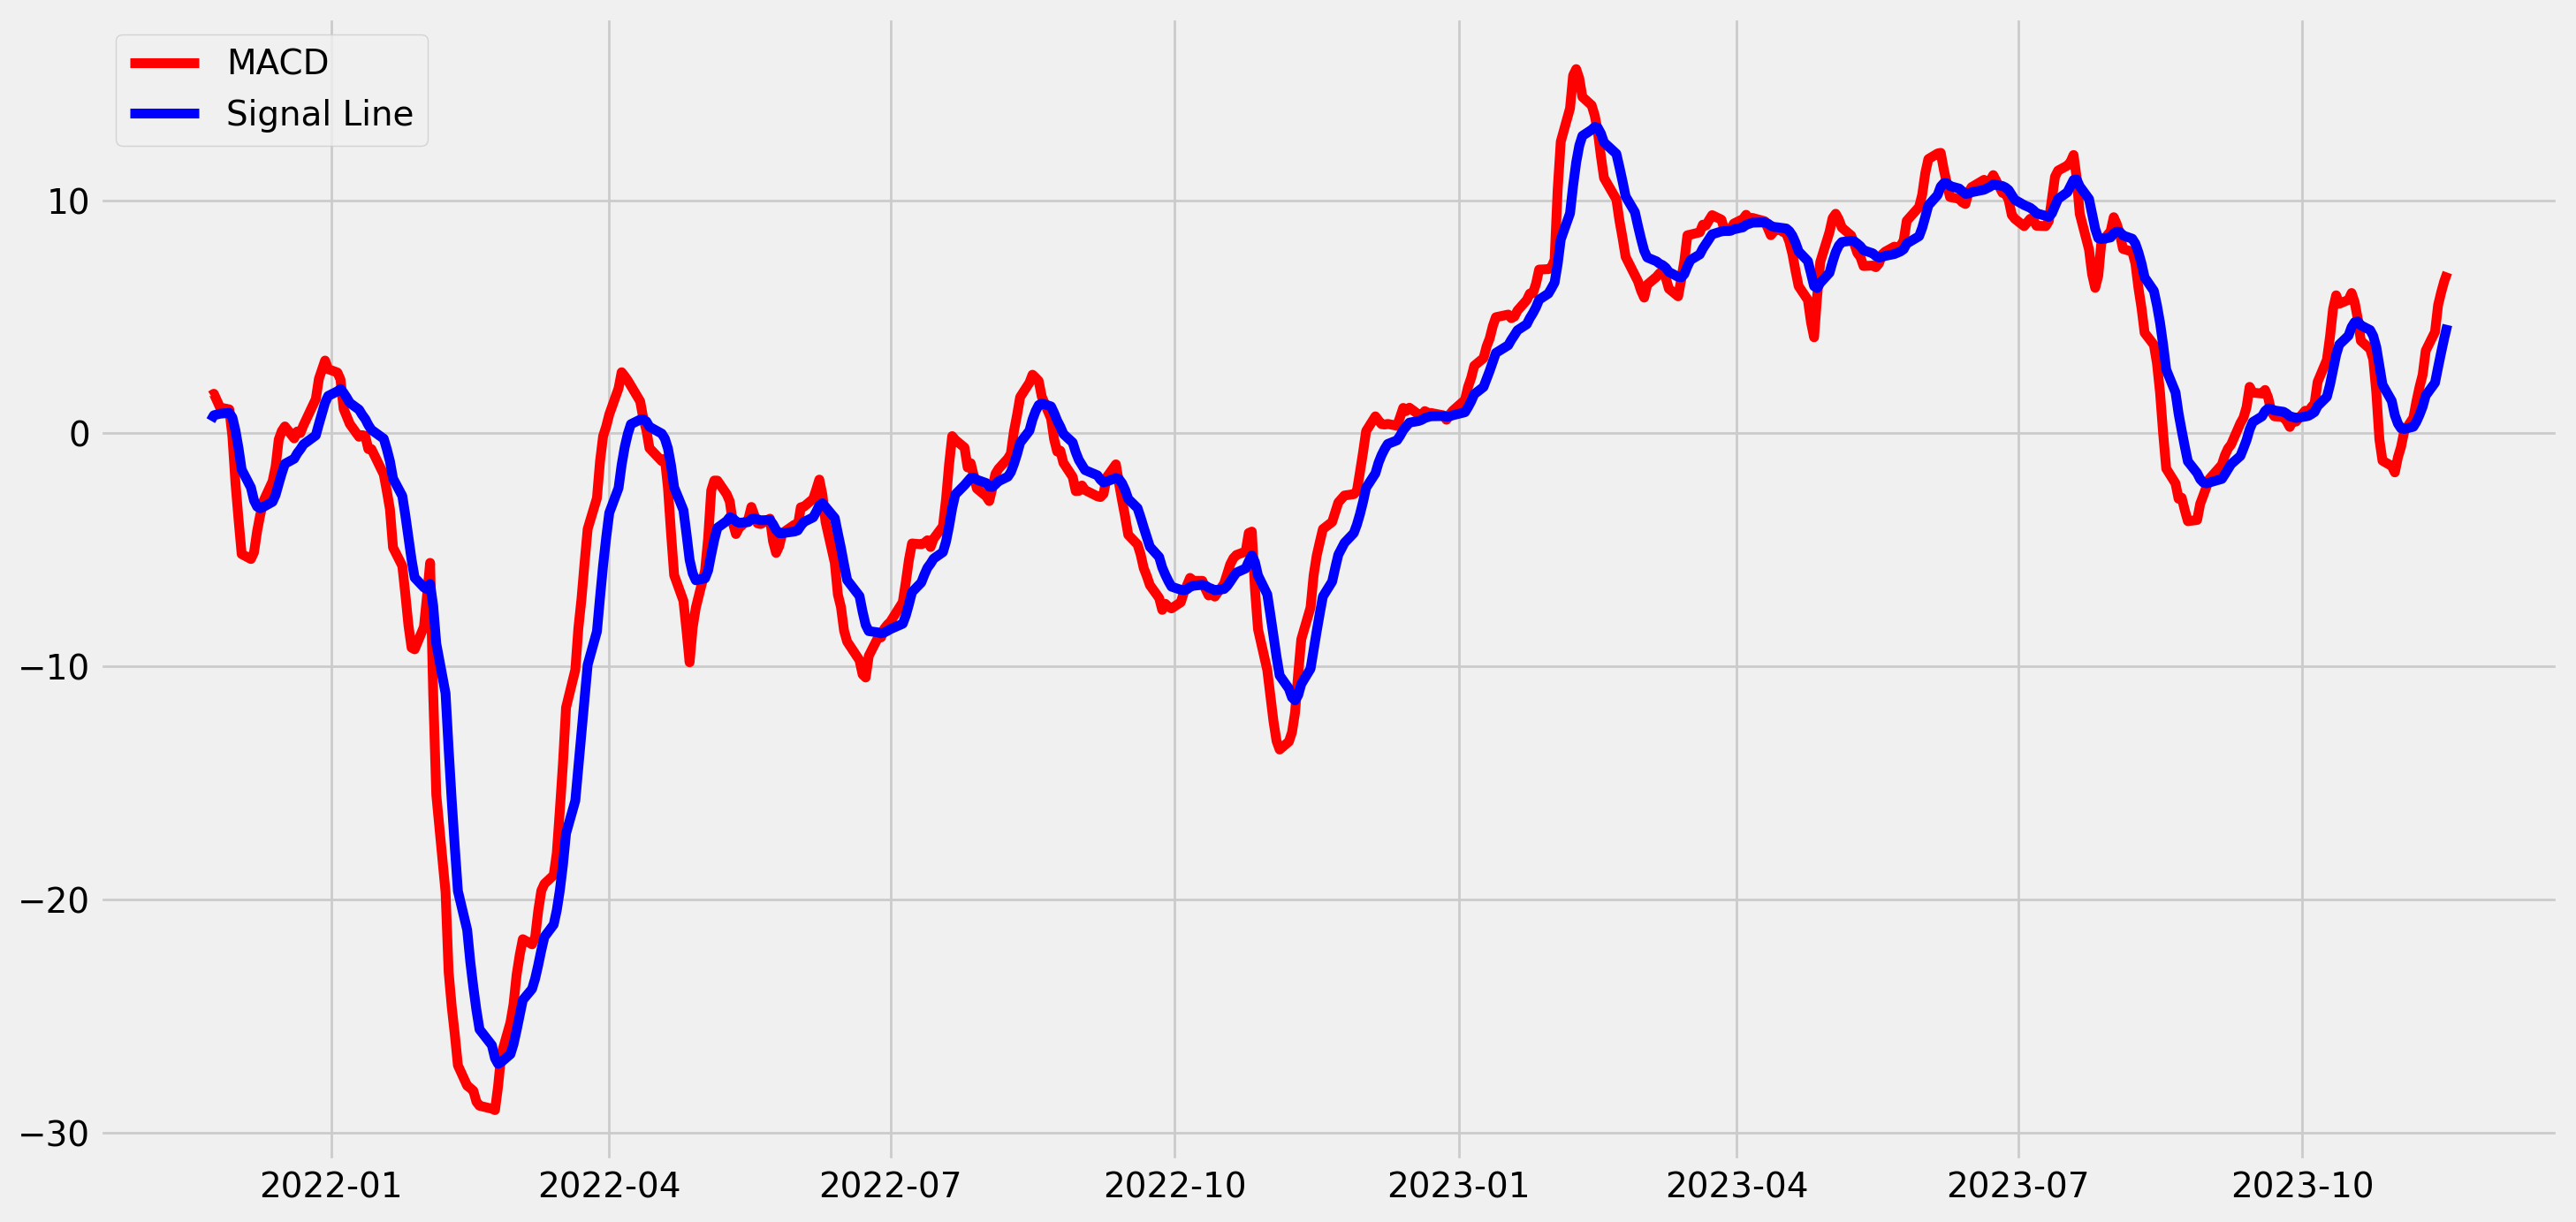

In [109]:
period = 500  # 可视化范围
plt.figure(figsize=(16,8), dpi=200)
plt.plot(df.index[-period:], MACD[-period:], label="MACD", color='red')
plt.plot(df.index[-period:], signal[-period:], label='Signal Line', color='blue')
plt.legend(loc='upper left')
# 使用AutoDateLocator自动确定日期的显示间隔
date_locator = mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(date_locator)
# 设置日期的显示格式为"%Y-%m"，即年份-月份
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#show
# plt.savefig("{}_Signal_Line.jpg".format(security))
plt.show()

In [110]:
df['MACD'] = MACD
df['Signal Line'] = signal
df.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2023-11-13,326.200012,332.329987,325.700012,329.190002,329.190002,16908900,4.344735,2.162199
2023-11-14,334.540009,338.100006,333.329987,336.309998,336.309998,17179400,5.493178,2.828395
2023-11-15,337.929993,338.399994,330.019989,332.709991,332.709991,14531200,6.043176,3.471351
2023-11-16,329.369995,334.579987,326.380005,334.190002,334.190002,18932600,6.523281,4.081737
2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400,6.892899,4.643969


In [111]:
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                # 买入信号
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                # 卖出信号
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
            
    return (Buy, Sell)
                

In [112]:
df['Buy_Signal_Price'], df['Sell_Signal_Price'] = buy_sell(df)
df.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,0.000000,0.000000,NaN,NaN
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,-0.335043,-0.067009,NaN,34.029999
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,-0.835432,-0.220693,NaN,NaN
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,-1.138182,-0.404191,NaN,NaN
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,-1.280243,-0.579401,NaN,NaN


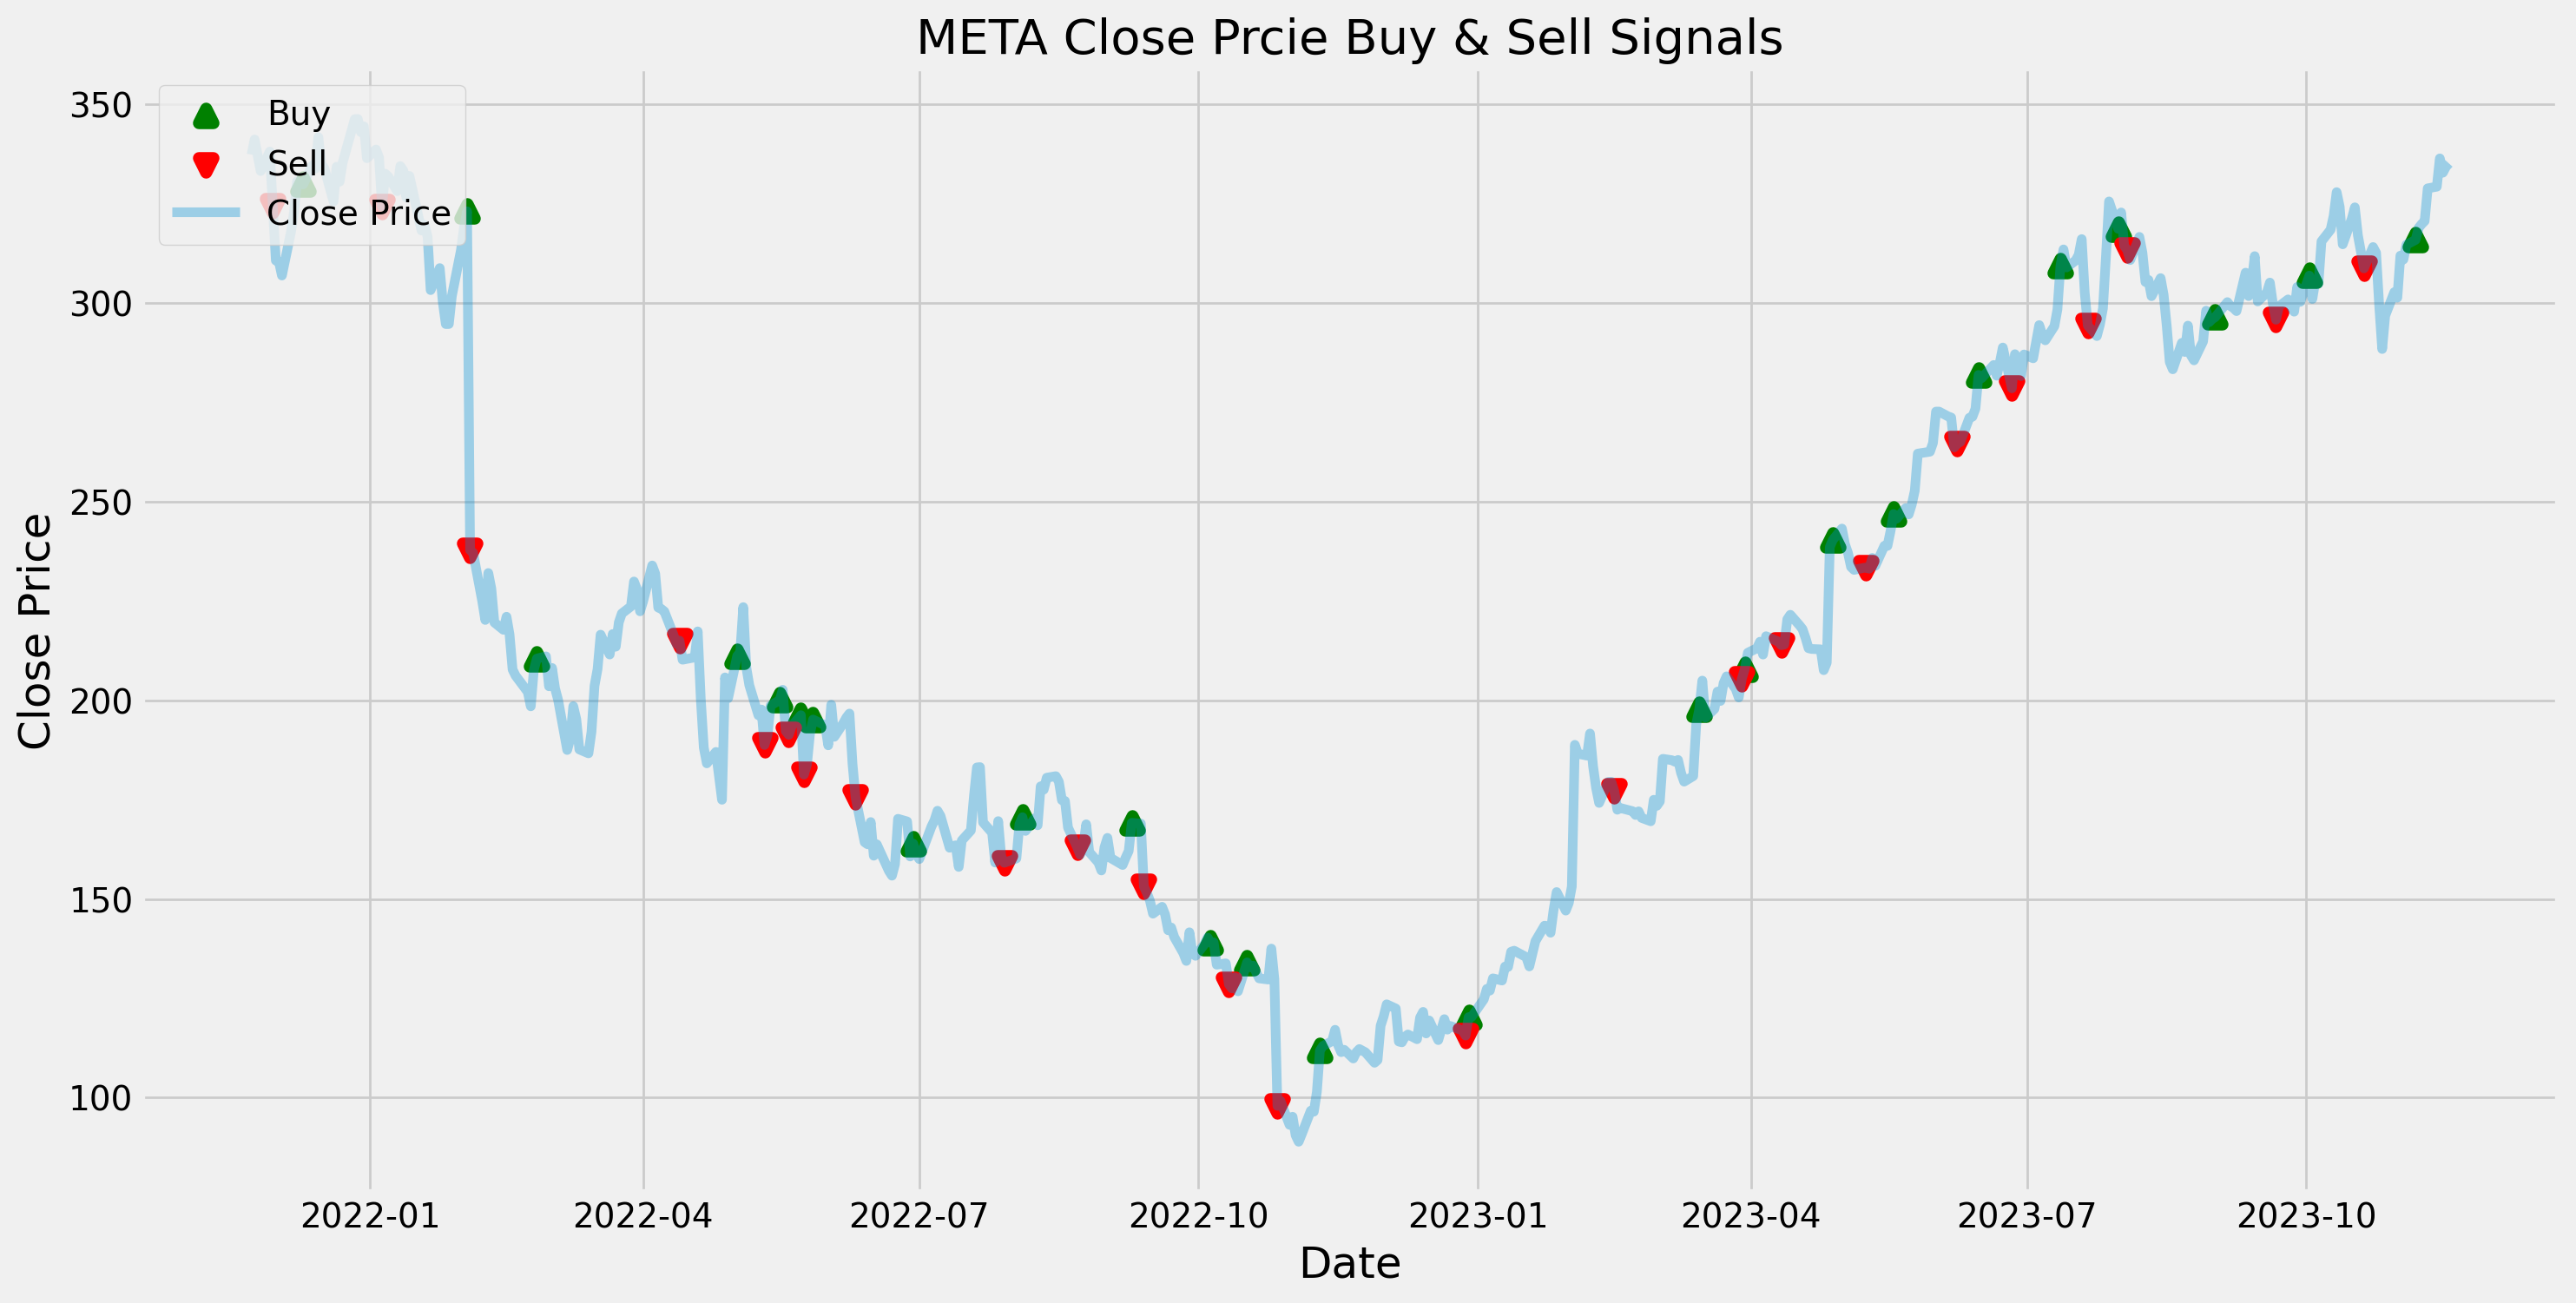

In [113]:
period = 500  # 可视化范围
plt.figure(figsize=(16,8), dpi=200)
plt.scatter(df.index[-period:], df['Buy_Signal_Price'][-period:], label="Buy", color='green', marker='^',alpha=1, linewidths=5)
plt.scatter(df.index[-period:], df['Sell_Signal_Price'][-period:], label="Sell", color='red', marker='v',alpha=1, linewidths=5)
plt.plot(df['Close'][-period:], label='Close Price', alpha=0.35)
plt.title('{} Close Prcie Buy & Sell Signals'.format(security))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(loc='upper left')
# 使用AutoDateLocator自动确定日期的显示间隔
date_locator = mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(date_locator)
# 设置日期的显示格式为"%Y-%m"，即年份-月份
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#show
# plt.savefig("{}_Buy_Sell_signal.jpg".format(security))
plt.show()

In [114]:
his_period = 60
df['Prediction'] = df[['Close']].shift(-his_period)
df.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price,Prediction
Date,,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,0.000000,0.000000,NaN,NaN,20.379999
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,-0.335043,-0.067009,NaN,34.029999,21.200001
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,-0.835432,-0.220693,NaN,NaN,19.870001
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,-1.138182,-0.404191,NaN,NaN,19.049999
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,-1.280243,-0.579401,NaN,NaN,20.010000


In [115]:
# 为了避免训练数据泄露，对signal数据进行onehot处理
df['Buy_Signal_Price'][np.invert(df['Buy_Signal_Price'].isna())] = 1
df['Buy_Signal_Price'] = df['Buy_Signal_Price'].fillna(0)

df['Sell_Signal_Price'][np.invert(df['Sell_Signal_Price'].isna())] = 1
df['Sell_Signal_Price'] = df['Sell_Signal_Price'].fillna(0)

C:\Users\Steven Chen\AppData\Local\Temp\ipykernel_28916\2732453143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Buy_Signal_Price'][np.invert(df['Buy_Signal_Price'].isna())] = 1
C:\Users\Steven Chen\AppData\Local\Temp\ipykernel_28916\2732453143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sell_Signal_Price'][np.invert(df['Sell_Signal_Price'].isna())] = 1


In [116]:
df.drop(labels='Prediction', axis=1)

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,0.000000,0.000000,0.0,0.0
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,-0.335043,-0.067009,0.0,1.0
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,-0.835432,-0.220693,0.0,0.0
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,-1.138182,-0.404191,0.0,0.0
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,-1.280243,-0.579401,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-11-13,326.200012,332.329987,325.700012,329.190002,329.190002,16908900,4.344735,2.162199,0.0,0.0
2023-11-14,334.540009,338.100006,333.329987,336.309998,336.309998,17179400,5.493178,2.828395,0.0,0.0
2023-11-15,337.929993,338.399994,330.019989,332.709991,332.709991,14531200,6.043176,3.471351,0.0,0.0


In [117]:
# 训练集
X = np.array(df.drop(labels='Prediction',axis=1)[:-his_period])
print(X)

[[ 4.20499992e+01  4.50000000e+01  3.80000000e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.65299988e+01  3.66599998e+01  3.30000000e+01 ... -6.70085592e-02
   0.00000000e+00  1.00000000e+00]
 [ 3.26100006e+01  3.35900002e+01  3.09400005e+01 ... -2.20693220e-01
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.92549988e+02  2.92899994e+02  2.86750000e+02 ...  8.37042969e-01
   0.00000000e+00  0.00000000e+00]
 [ 2.88500000e+02  2.97399994e+02  2.87670013e+02 ...  1.16246935e-01
   0.00000000e+00  0.00000000e+00]
 [ 2.98500000e+02  2.99459991e+02  2.86640015e+02 ... -5.66349588e-01
   0.00000000e+00  0.00000000e+00]]


In [118]:
# 目标值
y = np.array(df['Prediction'][:-his_period])
y

array([ 20.37999916,  21.20000076,  19.87000084, ..., 332.70999146,
       334.19000244, 335.04000854])

In [119]:
x_train = X[:-his_period]
x_test = X[-his_period:]
y_train = y[:-his_period]
y_test = y[-his_period:]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2775, 10) (60, 10) (2775,) (60,)


In [120]:
tree = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1).fit(x_train, y_train)

In [121]:
prediction = tree.predict(x_test)
print("The model training score is" , tree.score(X, y))

The model training score is 0.9961512987939668


C:\Users\Steven Chen\AppData\Local\Temp\ipykernel_28916\1753908352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = prediction


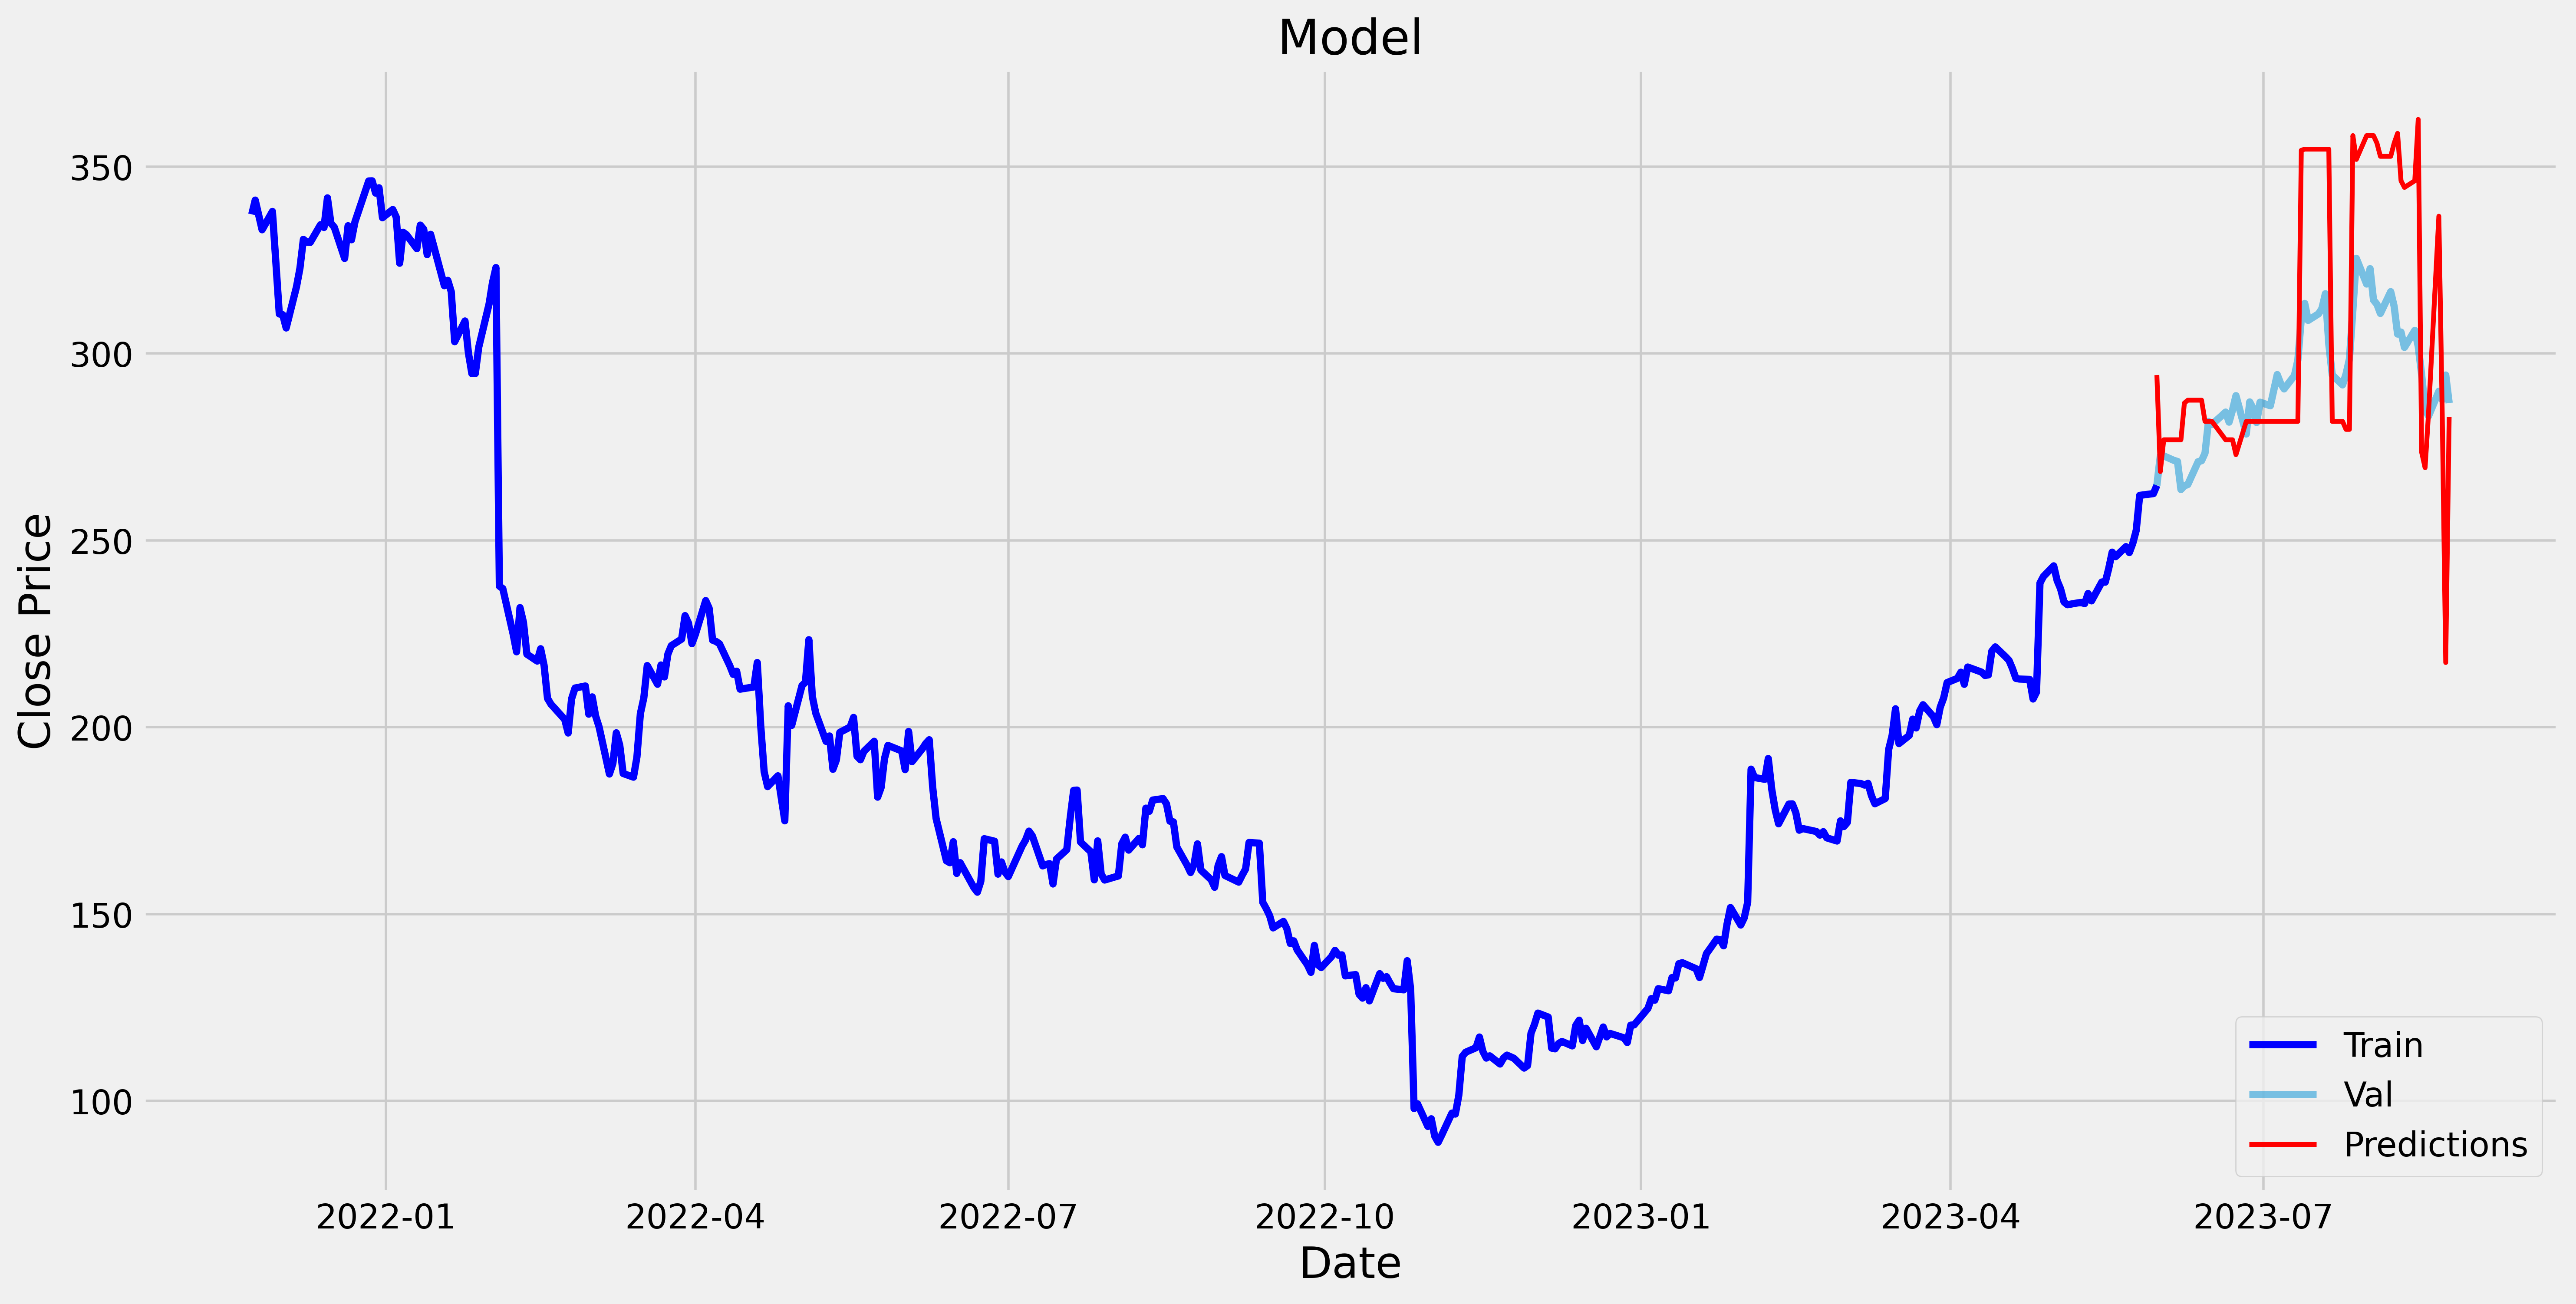

<Figure size 640x480 with 0 Axes>

In [122]:
period = 500  # 可视化范围
valid = df[X.shape[0]-his_period:-his_period]
valid['Prediction'] = prediction
plt.figure(figsize=(16,8), dpi=400)
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df[-period:X.shape[0]-his_period+1]['Close'], linewidth=3, color='blue')
plt.plot(valid['Close'], linewidth=3, alpha=0.5)
plt.plot(valid['Prediction'], linewidth=2, color='red')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
# plt.legend(['Train', 'Val', 'Predictions'], loc='lower left')
# 使用AutoDateLocator自动确定日期的显示间隔
date_locator = mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(date_locator)
# 设置日期的显示格式为"%Y-%m"，即年份-月份
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#show
plt.show()
plt.savefig("MACD.jpg")

In [123]:
x_future = np.array(df.drop(labels=['Prediction'], axis=1)[-his_period:])
prediction = tree.predict(x_future)

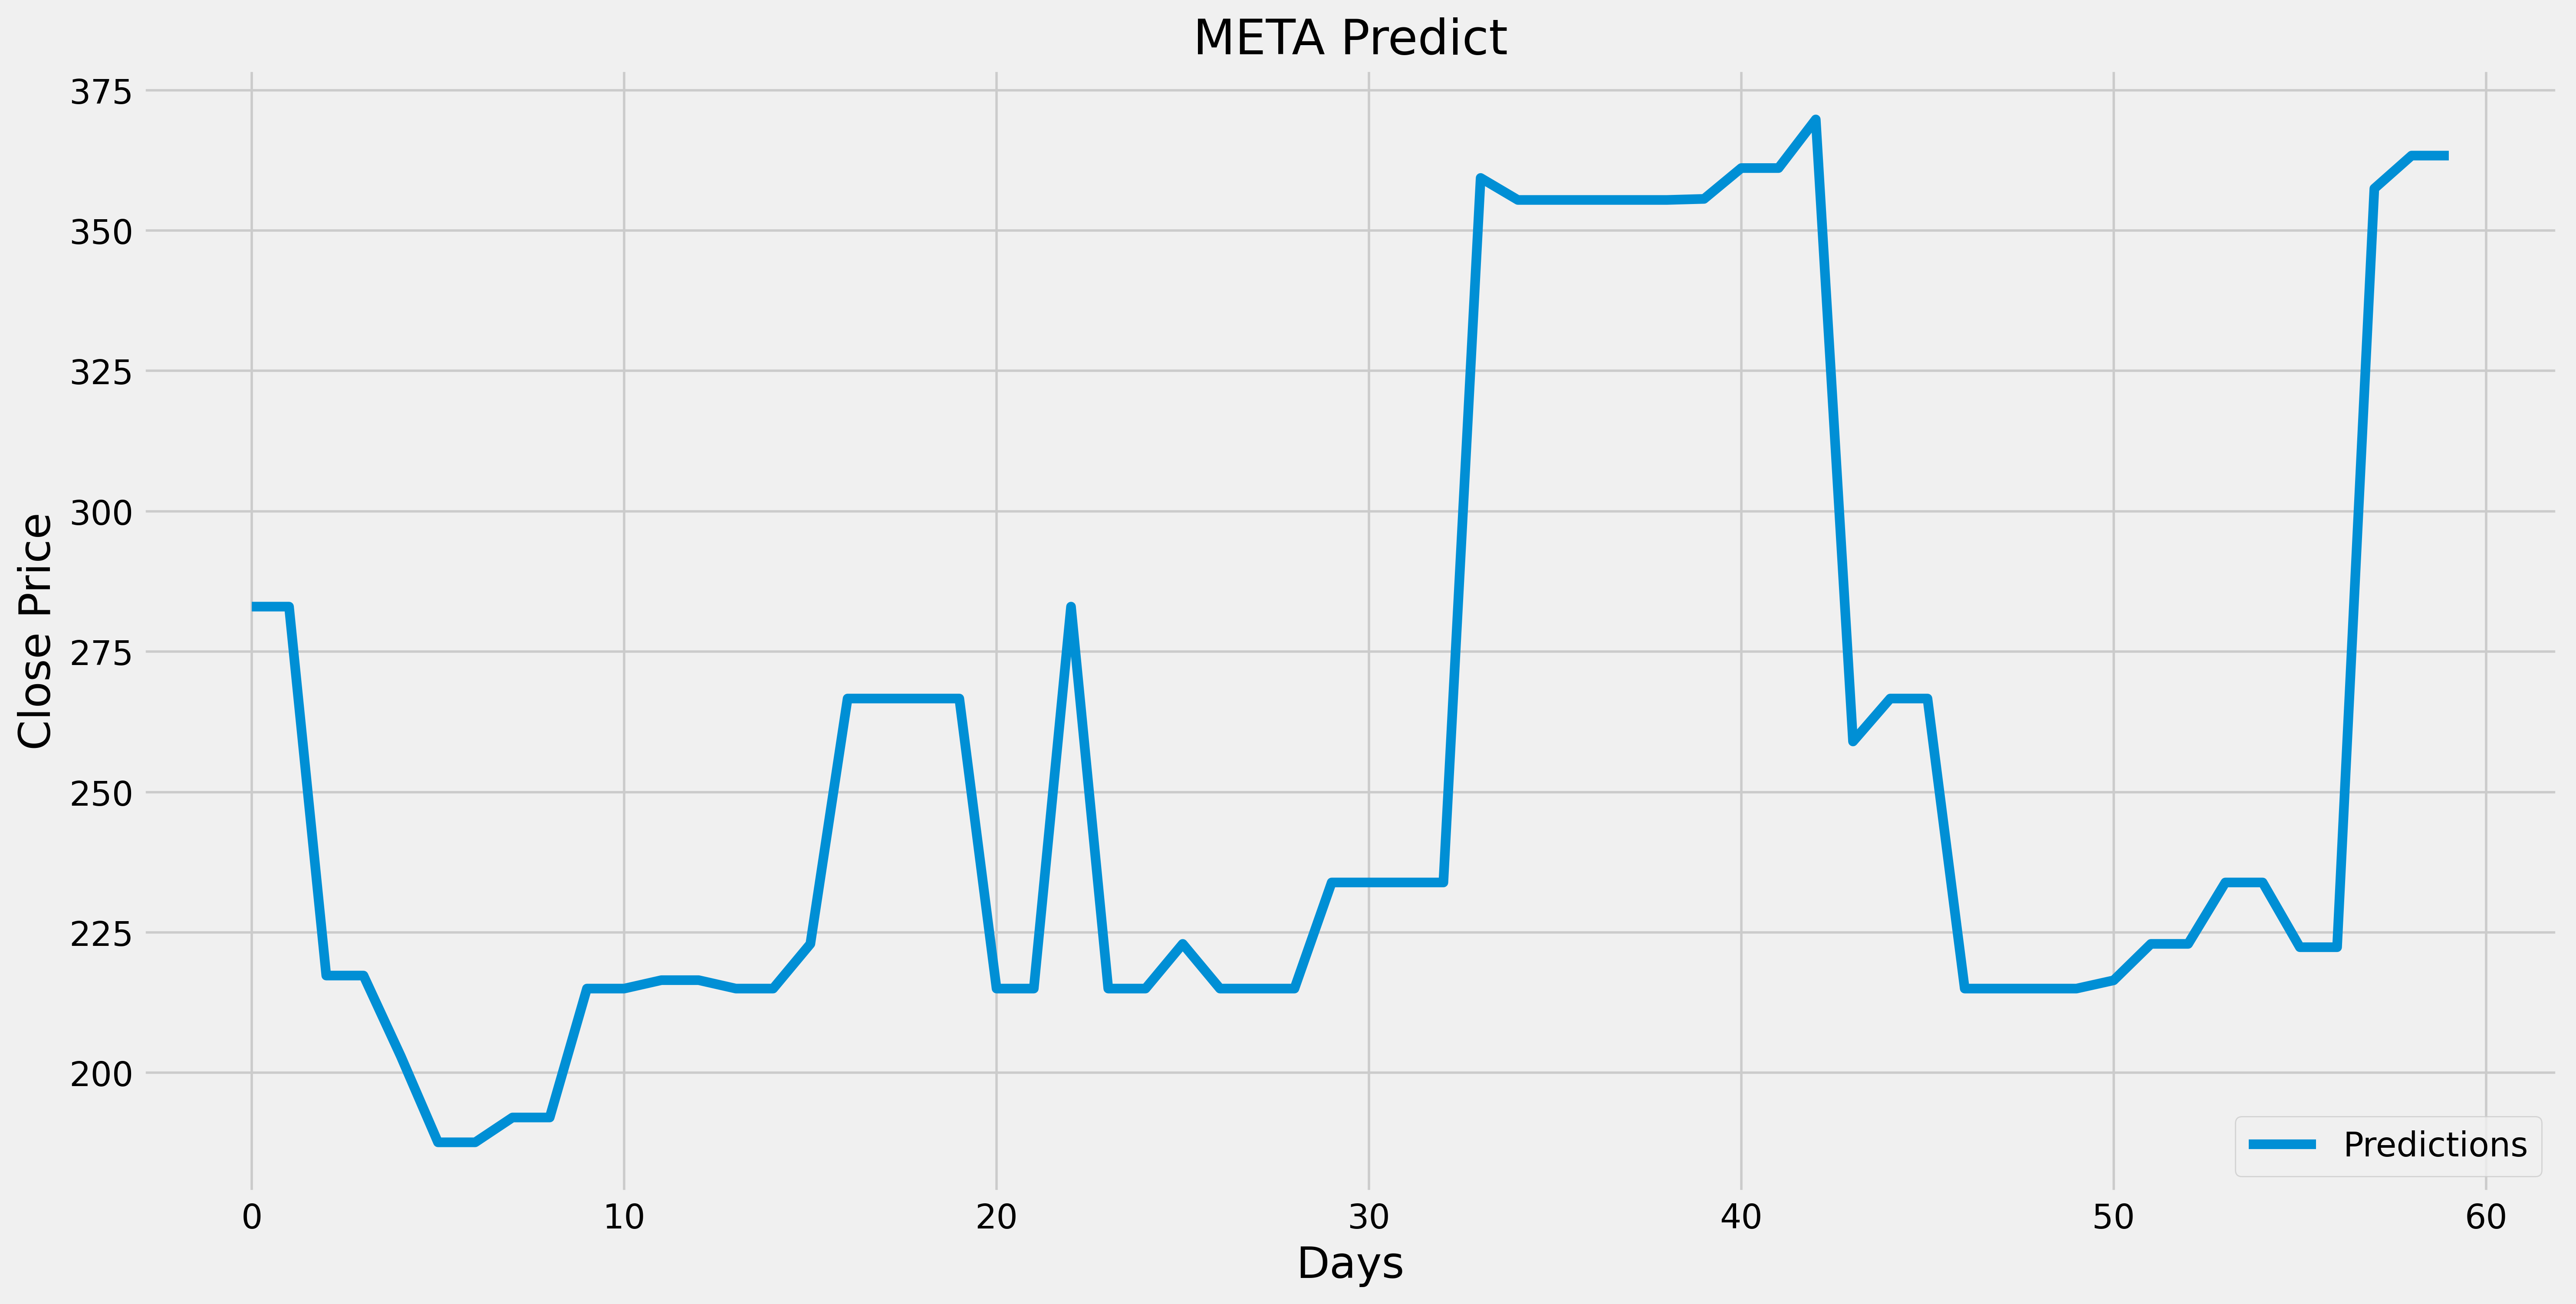

<Figure size 640x480 with 0 Axes>

In [124]:
plt.figure(figsize=(16,8), dpi=400)
plt.title('{} Predict'.format(security))
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(prediction)
plt.legend(['Predictions'], loc='lower right')
# plt.legend(['Predictions'], loc='lower left')
plt.show()
plt.savefig("MACD_predict.jpg")

In [125]:
prediction

array([283.01998901, 283.01998901, 217.30999756, 217.30999756,
       202.97000122, 187.61000061, 187.61000061, 192.02999878,
       192.02999878, 214.99000549, 214.99000549, 216.49000549,
       216.49000549, 214.99000549, 214.99000549, 222.94999695,
       266.6499939 , 266.6499939 , 266.6499939 , 266.6499939 ,
       214.99000549, 214.99000549, 283.01998901, 214.99000549,
       214.99000549, 222.94999695, 214.99000549, 214.99000549,
       214.99000549, 233.88999939, 233.88999939, 233.88999939,
       233.88999939, 359.36999512, 355.45001221, 355.45001221,
       355.45001221, 355.45001221, 355.45001221, 355.64001465,
       361.13000488, 361.13000488, 369.79000854, 259.        ,
       266.6499939 , 266.6499939 , 214.99000549, 214.99000549,
       214.99000549, 214.99000549, 216.46000671, 222.94999695,
       222.94999695, 233.88999939, 233.88999939, 222.36000061,
       222.36000061, 357.48001099, 363.3500061 , 363.3500061 ])

In [126]:
tree.feature_importances_

array([9.75052185e-03, 8.74473125e-01, 2.10463916e-02, 5.14611658e-03,
       4.65607102e-03, 3.02638058e-03, 1.80548374e-02, 6.34831602e-02,
       6.81702973e-05, 2.95225148e-04])